<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [14]:
import pandas as pd
import os
import tensorflow as tf
tf.keras.backend.clear_session()

BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load tensorflow models
Load detection_pipe


In [15]:
path_r = './../../dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl'
path_p = 'dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl'
tt_split(path_r)
table = pd.read_pickle(path_r)

./../../dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done


In [16]:
task = {'path_descr':path_r, 
        'feat':{'function':'frame', 'frames':5}, 
        'feat_col':'MEL_raw', 
        'SNR':'6dB', 
        'machine':'pump', 
        'ID':'00',
        'BASE_FOLDER':BASE_FOLDER}

df_train, data_train = load_data(**task, train_set=1)
df_test, data_test = load_data(**task, train_set=0)

In [17]:
inter_layers=[(tf.keras.layers.Dense, {'units':128, 'activation':tf.nn.relu}),
                               (tf.keras.layers.Dense, {'units':64, 'activation':tf.nn.relu}),
                               (tf.keras.layers.Dense, {'units':32, 'activation':tf.nn.relu}),
                               (tf.keras.layers.Dense, {'units':64, 'activation':tf.nn.relu}),
                               (tf.keras.layers.Dense, {'units':128, 'activation':tf.nn.relu})]

model_base = uni_AutoEncoder(inter_layers=inter_layers, epochs=10)

In [18]:
model_base.fit(data_train)

Epoch 1/10
1042/1042 [==============================] - 16s 16ms/step - loss: 33.7593
Epoch 2/10
1042/1042 [==============================] - 14s 13ms/step - loss: 17.7080
Epoch 3/10
1042/1042 [==============================] - 14s 13ms/step - loss: 44.5449
Epoch 4/10
1042/1042 [==============================] - 14s 13ms/step - loss: 30.4964
Epoch 5/10
1042/1042 [==============================] - 13s 13ms/step - loss: 24.8166
Epoch 6/10
1042/1042 [==============================] - 13s 12ms/step - loss: 23.1766
Epoch 7/10
1042/1042 [==============================] - 13s 13ms/step - loss: 20.2645
Epoch 8/10
1042/1042 [==============================] - 13s 12ms/step - loss: 20.6618
Epoch 9/10
1042/1042 [==============================] - 13s 13ms/step - loss: 19.9496
Epoch 10/10
1042/1042 [==============================] - 13s 13ms/step - loss: 22.6285


In [19]:
y_pred = model_base.predict(data_test)

In [20]:
error = np.square(data_test - y_pred)

In [21]:
error.shape

(88374, 400)

In [23]:
uncertain = np.mean(error, axis=1)
uncertain.shape

(88374,)

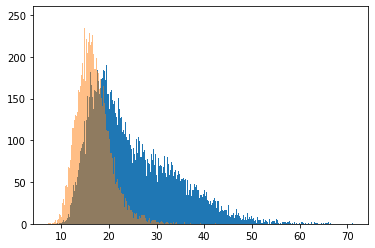

In [24]:
plt.hist(uncertain[df_test.abnormal==1], bins=1000);
plt.hist(uncertain[df_test.abnormal==0], bins=1000, alpha=.5);

In [25]:
y_true = df_test.abnormal

In [26]:
y_true

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
88369    0.0
88370    0.0
88371    0.0
88372    0.0
88373    0.0
Name: abnormal, Length: 88374, dtype: float64

In [27]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_true, uncertain)

0.8104606623663211